In [1]:
# standard imports I always use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
import scipy
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import mpld3
mpld3.enable_notebook()

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\lightning\types\decorators.py:61: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argspec = inspect.getargspec(VizType.clean)
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\lightning\types\decorators.py:61: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argspec = inspect.getargspec(VizType.clean)
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\lightning\types\decorators.py:61: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argspec = inspect.getargspec(VizType.clean)
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\lightning\types\decorators.py:61: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argspec = inspect.getargspec(VizType.clean)
C:\Users\ddooling\AppData\Local\Continuum\Anacon


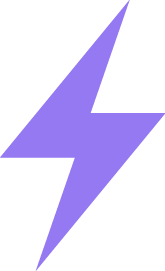

Running local mode, some functionality limited.




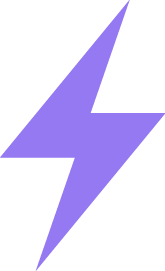

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

file:///E:/SEER/wifflepresentation.slides.html?theme=sky?transition=cube#/

http://damianavila.github.io/miscellaneus/test_slides.slides.html?theme=sky?transition=cube#/3/10

### <font color='teal'>Background</font>

In the statistical analysis of observational data, propensity score matching (PSM) is a statistical matching technique that attempts to estimate the effect of a treatment, policy, or other intervention by accounting for the covariates that predict receiving the treatment. PSM attempts to reduce the bias due to confounding variables that could be found in an estimate of the treatment effect obtained from simply comparing outcomes among units that received the treatment versus those that did not. The technique was first published by Paul Rosenbaum and Donald Rubin in 1983,[1] and implements the Rubin causal model for observational studies.

The possibility of bias arises because the apparent difference in outcome between these two groups of units may depend on characteristics that affected whether or not a unit received a given treatment instead of due to the effect of the treatment per se. In randomized experiments, the randomization enables unbiased estimation of treatment effects; for each covariate, randomization implies that treatment-groups will be balanced on average, by the law of large numbers. Unfortunately, for observational studies, the assignment of treatments to research subjects is typically not random. Matching attempts to mimic randomization by creating a sample of units that received the treatment that is comparable on all observed covariates to a sample of units that did not receive the treatment.

Another example slide. Trying to change the theme / css.

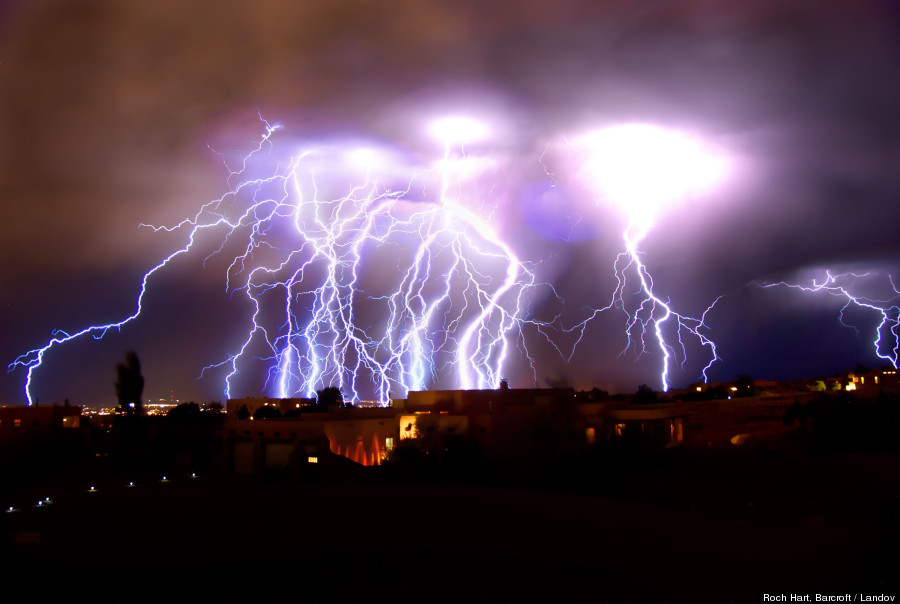

In [3]:
from IPython.display import Image
Image(url="http://i.huffpost.com/gen/557244/thumbs/o-ROCH-HART-LIGHTNING-ALBUQUERQUE-900.jpg",embed=True)

In [4]:
from IPython.display import HTML
from IPython.display import IFrame

We will illustrate our novel matching technique using major league baseball statistics from 2015. 
Our method directly finds suitable matches by finding nearest neightbors in the high dimensional feature space by means of KDTrees.



Grab the latest complete year of major league baseball team statistics. We will treat AL as being the "treatment", and NL as the "control."
First get the 2015 AL complete Team batting from http://www.baseball-reference.com/leagues/AL/2015.shtml 
or http://www.baseball-reference.com/leagues/NL/2015.shtml

## <font color='teal'>2015 American League Team Data</font>

In [5]:
IFrame("http://www.baseball-reference.com/leagues/AL/2015.shtml",width=700, height=350)

## <font color='teal'>2015 National League Team Data</font>

In [6]:
IFrame("http://www.baseball-reference.com/leagues/NL/2015.shtml",width=700, height=350)

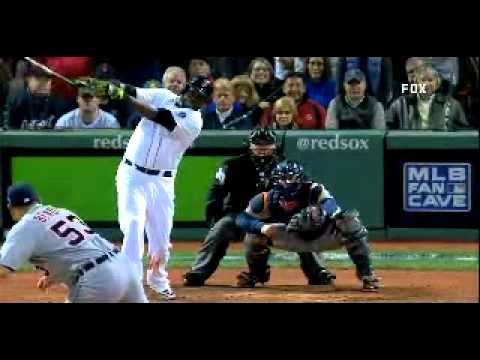

In [7]:
from IPython.display import YouTubeVideo
# a designated hitter hitting a home run
YouTubeVideo('ClylGO9wE1c')


## Put this as a style element so that we only show markdown cells and the contents of output cells.  Put it right before the Twitter Bootstrap style tag.

```
<style type="text/css">
.input_prompt, .input_area, .output_prompt {
    display:none !important;
}
</style>
```

## And put the following Just before the body tag


```

<style type="text/css">
    /* 1. Style header/footer <div> so they are positioned as desired. */
    #header-left {
        position: absolute;
        top: 0%;
        left: 0%;
    }
    #header-right {
        position: absolute;
        top: 0%;
        right: 0%;
    }
    #footer-left {
        position: absolute;
        bottom: 0%;
        left: 0%;
    }
</style>

<!-- 2. Create hidden header/footer <div> -->
<div id="hidden" style="display:none;">
    <div id="header">
        <div id="header-left"></div>
        <div id="header-right"></div>
        <div id="footer-left">Innovative Oncology Business Solutions <br>
        <img class="header-left-image" src="iobslogo.png">
        </div>
    </div>
</div>

<script src="https://code.jquery.com/jquery-2.2.4.min.js"></script>
<script type="text/javascript">
    // 3. On Reveal.js ready event, copy header/footer <div> into each `.slide-background` <div>
    var header = $('#header').html();
    if ( window.location.search.match( /print-pdf/gi ) ) {
        Reveal.addEventListener( 'ready', function( event ) {
            $('.slide-background').append(header);
        });
    }
    else {
        $('div.reveal').append(header);
   }
</script>

```

In [8]:

altables = pd.read_html('http://www.baseball-reference.com/leagues/AL/2015.shtml')
altables[5].head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,BAL,48,27.9,4.40,162,6007,5485,713,1370,246,...,0.421,0.728,97,2307,127,51,20,32,23,990
1,BOS,51,28.3,4.62,162,6237,5640,748,1495,294,...,0.415,0.740,98,2338,127,46,30,42,28,1142
2,CHW,40,28.2,3.84,162,6070,5533,622,1381,260,...,0.380,0.686,91,2103,125,65,30,37,22,1065
3,CLE,49,27.9,4.16,161,6109,5439,669,1395,303,...,0.401,0.725,94,2179,134,39,47,50,34,1147
4,DET,47,28.3,4.28,161,6159,5605,689,1515,289,...,0.420,0.748,106,2355,152,41,23,35,36,1111


In [9]:
dfal2015batting = altables[5].copy()
dfal2015pitching = altables[6].copy()

dfal2015batting.set_index('Tm',inplace=True)

dfal2015pitching.set_index('Tm',inplace=True)

dfal2015pitching.columns = [c + '_p' for c in dfal2015pitching.columns]
print(dfal2015pitching.columns)

dfal2015 = pd.concat([dfal2015batting, dfal2015pitching],axis=1,verify_integrity=True)

nltables = pd.read_html('http://www.baseball-reference.com/leagues/NL/2015.shtml')
print(len(nltables))

dfnl2015batting = nltables[5].copy()
dfnl2015pitching = nltables[6].copy()

dfnl2015batting.set_index('Tm',inplace=True)
dfnl2015pitching.set_index('Tm',inplace=True)


dfnl2015pitching.columns = [c + '_p' for c in dfnl2015pitching.columns]
print(dfnl2015pitching.columns)

dfnl2015 = pd.concat([dfnl2015batting, dfnl2015pitching],axis=1,verify_integrity=True)

Index(['#P_p', 'PAge_p', 'RA/G_p', 'W_p', 'L_p', 'W-L%_p', 'ERA_p', 'G_p',
       'GS_p', 'GF_p', 'CG_p', 'tSho_p', 'cSho_p', 'SV_p', 'IP_p', 'H_p',
       'R_p', 'ER_p', 'HR_p', 'BB_p', 'IBB_p', 'SO_p', 'HBP_p', 'BK_p', 'WP_p',
       'BF_p', 'ERA+_p', 'FIP_p', 'WHIP_p', 'H9_p', 'HR9_p', 'BB9_p', 'SO9_p',
       'SO/W_p', 'LOB_p'],
      dtype='object')
9
Index(['#P_p', 'PAge_p', 'RA/G_p', 'W_p', 'L_p', 'W-L%_p', 'ERA_p', 'G_p',
       'GS_p', 'GF_p', 'CG_p', 'tSho_p', 'cSho_p', 'SV_p', 'IP_p', 'H_p',
       'R_p', 'ER_p', 'HR_p', 'BB_p', 'IBB_p', 'SO_p', 'HBP_p', 'BK_p', 'WP_p',
       'BF_p', 'ERA+_p', 'FIP_p', 'WHIP_p', 'H9_p', 'HR9_p', 'BB9_p', 'SO9_p',
       'SO/W_p', 'LOB_p'],
      dtype='object')


## <font color='teal'>The League Column</font>

Now we need to add a column that has the value 1 for teams in the AL and value 0 for teams in the NL.

In [10]:
dfal2015['League'] = 1
dfnl2015['League'] = 0


In [11]:
dfal2015.drop(['LgAvg',np.nan],inplace=True)
dfnl2015.drop(['LgAvg',np.nan],inplace=True)

df2015 = pd.concat([dfal2015, dfnl2015])


In [12]:
import ipywidgets as widgets
widgets.Widget.widget_types.values()

dict_values([<class 'ipywidgets.widgets.widget_float.FloatSlider'>, <class 'ipywidgets.widgets.widget_float.FloatProgress'>, <class 'ipywidgets.widgets.widget_int.IntRangeSlider'>, <class 'ipywidgets.widgets.widget_float.FloatText'>, <class 'ipywidgets.widgets.widget_selection.SelectionSlider'>, <class 'ipywidgets.widgets.widget_string.HTML'>, <class 'ipywidgets.widgets.widget_float.BoundedFloatText'>, <class 'ipywidgets.widgets.widget_int.BoundedIntText'>, <class 'ipywidgets.widgets.widget_selection.ToggleButtons'>, <class 'ipywidgets.widgets.widget_button.Button'>, <class 'ipywidgets.widgets.widget_box.Box'>, <class 'ipywidgets.widgets.widget_string.Textarea'>, <class 'ipywidgets.widgets.widget_float.FloatRangeSlider'>, <class 'ipywidgets.widgets.widget_box.Proxy'>, <class 'ipywidgets.widgets.widget_controller.Controller'>, <class 'ipywidgets.widgets.widget_bool.Checkbox'>, <class 'ipywidgets.widgets.widget_selection.RadioButtons'>, <class 'ipywidgets.widgets.widget_box.FlexBox'>, <c

The columns that characterize each team


* **#Bat** Number of Players used in games
* **BatAge** Batters' average age, weighted by AB + Games Played
* **R/G** Runs Scored Per Game
* **G** Games Played
* **PA** Plate Appearances. When available, we use actual plate appearances from play-by-play game accounts. Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interference
* **AB** At Bats
* **R** Runs Scored
* **H** Hits
* **2B** Doubles Hit

* **3B** Triples Hit
* **HR** Home Runs Hit
* **RBI** Runs Batted In
* **SB** Stolen Bases
* **CS** Caught Stealing
* **BB** Bases on Balls/Walks
* **SO** Strikeouts
* **BA** Hits/At Bats
* **OBP** (H + BB + HBP)/(At Bats + BB + HBP + SF)
* **SLG** Total Bases/At Bats or (1B + 2\*2B + 3\*3B + 4\*HR)/AB 

* **OPS** On-Base + Slugging Percentage
* **OPS+** 
* **TB** Total Bases
* **GDP** Double Plays Grounded Into
* **HBP** Times Hit by a Pitch
* **SH** Sacrifice Hits (Sacrifice Bunts)
* **SF** Sacrifice Flies
* **IBB** Intentional Bases on Balls
* **LOB** Runners Left On Base

* **#P_p** Number of pitchers used in games
* **PAge_p** Pithchers' average age
* **RA/G_p** Runs allowed per game
* **W_p** Wins
* **L_p** Losses
* **W-L&#37;_p** Win-Loss Percentage 
* **ERA_p** 9 * ER/ IP
* **G_p** Games Pitched
* **GS_p** Games Started
* **GF_p** Games finished
* **CG_p** Complete Game
* **tSho_p** Shutouts by a team, no runs allowed in a game by one or more pitchers.

* **cSho_p** Shutouts. No runs allowed and a complete game
* **SV_p** Saves
* **IP_p** Innings Pitched
* **H_p** Hits allowed
* **R_p** Runs allowed
* **ER_p** Earned Runs allowed
* **HR_p** Home Runs allowed
* **BB_p** Bases on Balls/Walks
* **IBB_p** Intentional Bases on Balls
* **SO_p** Strikeouts
* **HBP_p** Times a pitcher hit a batter
* **BK_p** Balks
* **WP_p** Wild Pitches

* **BF_p** Batters faced
* **ERA+_p** ERA adjusted to the player's ballpark
* **FIP+p** Fielding Independent Pitching
* **WHIP+p** (BB+H)/IP
* **H9_p** 9\*H/IP
* **HR9_p** 9\*HR/IP
* **BB9+p** 9\*BB/IP
* **SO9_p** 9\*SO/IP
* **SO/W_p** Strikeouts to Walks ratio 
* **LOB_p** Runners Left on Base

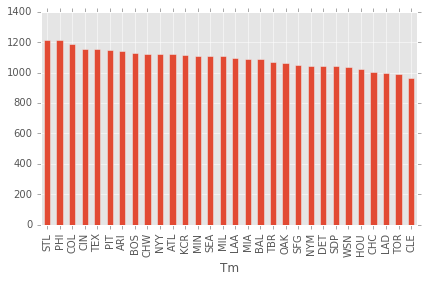

In [13]:
mpld3.disable_notebook()
df2015['LOB_p'].sort_values(ascending=False).plot(kind='bar',rot=90)
plt.tight_layout()
plt.show();

In [14]:
df2015.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,ERA+_p,FIP_p,WHIP_p,H9_p,HR9_p,BB9_p,SO9_p,SO/W_p,LOB_p,League
Tm,,,,,,,,,,,,,,,,,,,,,
BAL,48,27.9,4.40,162,6007,5485,713,1370,246,20,...,102,4.11,1.317,8.8,1.1,3.0,7.7,2.55,1088,1
BOS,51,28.3,4.62,162,6237,5640,748,1495,294,33,...,100,4.17,1.356,9.2,1.1,3.0,7.6,2.55,1127,1
CHW,40,28.2,3.84,162,6070,5533,622,1381,260,27,...,98,3.82,1.320,8.9,1.0,2.9,8.4,2.87,1122,1
CLE,49,27.9,4.16,161,6109,5439,669,1395,303,29,...,115,3.62,1.186,8.0,1.0,2.7,8.8,3.31,966,1
DET,47,28.3,4.28,161,6159,5605,689,1515,289,49,...,86,4.46,1.368,9.3,1.2,3.0,6.8,2.25,1044,1


In [15]:
df2015.tail()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,ERA+_p,FIP_p,WHIP_p,H9_p,HR9_p,BB9_p,SO9_p,SO/W_p,LOB_p,League
Tm,,,,,,,,,,,,,,,,,,,,,
PIT,46,28.2,4.30,162,6285,5631,697,1462,292,27,...,118,3.36,1.239,8.4,0.7,2.7,8.1,2.95,1150,0
SDP,46,27.7,4.01,162,6019,5457,650,1324,260,36,...,91,3.93,1.310,8.6,1.1,3.2,8.7,2.70,1041,0
SFG,48,28.9,4.30,162,6153,5565,696,1486,288,39,...,101,3.91,1.229,8.4,1.0,2.7,7.3,2.70,1049,0
STL,46,28.4,3.99,162,6139,5484,647,1386,288,39,...,133,3.47,1.254,8.4,0.8,2.9,8.2,2.79,1215,0
WSN,44,28.4,4.34,162,6117,5428,703,1363,265,13,...,110,3.45,1.206,8.6,0.9,2.3,8.4,3.69,1036,0


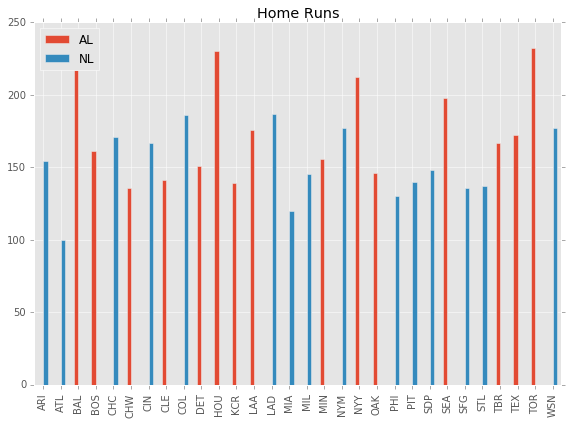

In [122]:
mpld3.disable_notebook()

one = df2015.HR[df2015['League'] == 1]
two = df2015.HR[df2015['League'] == 0]
dfhr = pd.DataFrame({'AL': one,
                    'NL': two})
dfhr.plot(kind='bar',title='Home Runs',figsize=(8,6))
plt.tight_layout()
plt.show();

## <font color='teal'>Structural Differences between the AL and NL</font>

There do exist structural differences between the AL and the NL:

* In the AL, pitchers do not bat. Instead, there is a Designated Hitter who does not play in the field (generally these are old guys who are slow but can still hit very well)
* in the NL, there is much more aggressive base running and stolen bases to make up for the fact that pitchers are generally  horrible hitters
* In general, NL pitchers have better statistics and AL offense has better statistics

Knowing that there are these structural differences between the two leagues, we cannot simply use all AL teams as our treatment group and all NL teams as our control group. We need to intelligently match them at the feature level.
First, let's illustrate that these structural differences exist.

## <font color='teal'>Why We need Matching</font>

If we are not careful and do not match teams with similar characteristics and just compare NL and AL group statistics, we run the risk of attributing effects to spurious causes. For example, if we find that AL baseball players are more likely to have graying hair then NL baseball players and we didn't match, we would attribute the graying as being an effect of which league. But really its an effect of AL players being older.

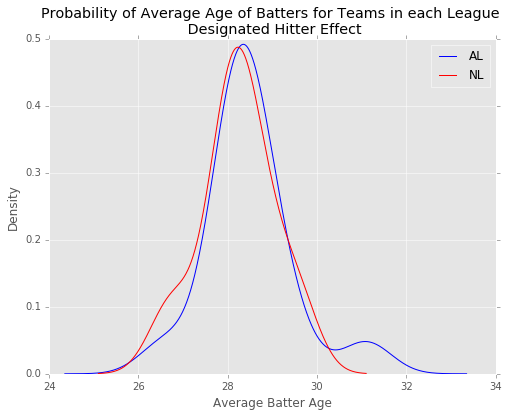

In [119]:
mpld3.enable_notebook()
fig = plt.figure(figsize=(8,6))
df2015['BatAge'][df2015['League'] == 1].plot.kde(color='blue',label='AL')
df2015['BatAge'][df2015['League'] == 0].plot.kde(color='red',label='NL')
plt.legend()
plt.xlabel('Average Batter Age')
plt.title("Probability of Average Age of Batters for Teams in each League \n Designated Hitter Effect")
plt.show();



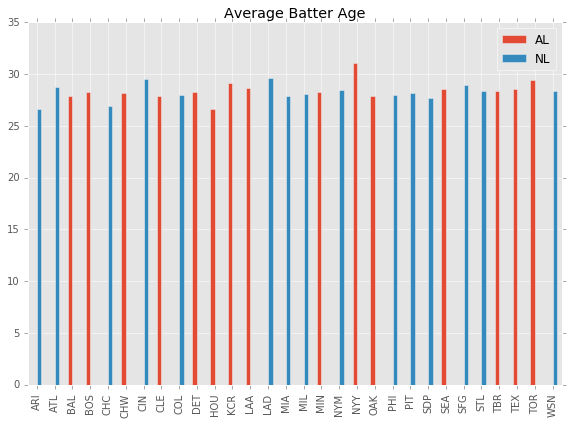

In [118]:
mpld3.disable_notebook()
one = df2015.BatAge[df2015['League'] == 1]
two = df2015.BatAge[df2015['League'] == 0]
dfbatage = pd.DataFrame({'AL': one,
                    'NL': two})
dfbatage.plot(kind='bar',title='Average Batter Age',figsize=(8,6))
plt.tight_layout()
plt.show();

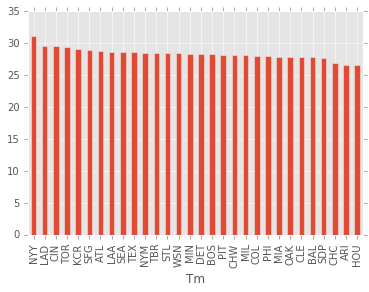

In [19]:
df2015.BatAge.sort_values(ascending=False).plot(kind='bar')

## <font color='teal'>Another Example of Why Careful Matching is Necessary</font>

Some baseball players are very fast and stealing bases is part of their skillset. The number of stolen bases can be taken as a surrogate statistic for how fast a player or team is. But because of the structural differences between the Leagues, there are more stolen bases in national league games. Without matching and performing an analysis, you could be in danger of concluding that being in the national league makes you faster. That is incorrect thinking. What is true is that if you like to steal bases, you are more likely to play in the national league.
These types of logical pitfalls careover into the healthcare domain in observational studies.
So we need to match teams (or patients) in the treatment group with teams (or patients) in the treatment group. 

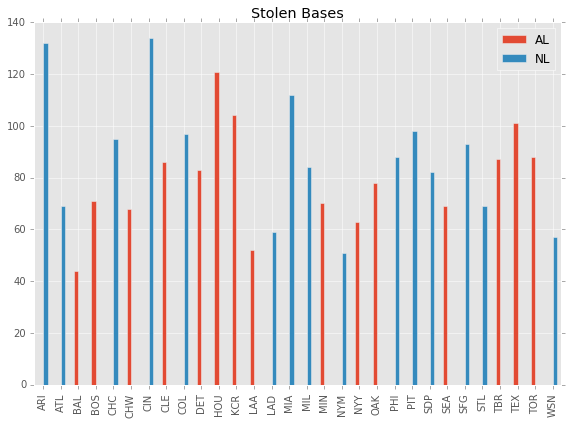

In [117]:
mpld3.disable_notebook()
one = df2015.SB[df2015['League'] == 1]
two = df2015.SB[df2015['League'] == 0]
dfbatage = pd.DataFrame({'AL': one,
                    'NL': two})
dfbatage.plot(kind='bar',title='Stolen Bases',figsize=(8,6))
plt.tight_layout()
plt.show();

**<font color='teal'>Houston used to be a National League team. Became an American League team in 2013</font>**

In [21]:
df2015tree = df2015.copy()
df2015tree.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', '#P_p', 'PAge_p', 'RA/G_p',
       'W_p', 'L_p', 'W-L%_p', 'ERA_p', 'G_p', 'GS_p', 'GF_p', 'CG_p',
       'tSho_p', 'cSho_p', 'SV_p', 'IP_p', 'H_p', 'R_p', 'ER_p', 'HR_p',
       'BB_p', 'IBB_p', 'SO_p', 'HBP_p', 'BK_p', 'WP_p', 'BF_p', 'ERA+_p',
       'FIP_p', 'WHIP_p', 'H9_p', 'HR9_p', 'BB9_p', 'SO9_p', 'SO/W_p', 'LOB_p',
       'League'],
      dtype='object')

In [22]:
y = df2015tree['League'].copy()
df2015tree.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,ERA+_p,FIP_p,WHIP_p,H9_p,HR9_p,BB9_p,SO9_p,SO/W_p,LOB_p,League
Tm,,,,,,,,,,,,,,,,,,,,,
BAL,48,27.9,4.40,162,6007,5485,713,1370,246,20,...,102,4.11,1.317,8.8,1.1,3.0,7.7,2.55,1088,1
BOS,51,28.3,4.62,162,6237,5640,748,1495,294,33,...,100,4.17,1.356,9.2,1.1,3.0,7.6,2.55,1127,1
CHW,40,28.2,3.84,162,6070,5533,622,1381,260,27,...,98,3.82,1.320,8.9,1.0,2.9,8.4,2.87,1122,1
CLE,49,27.9,4.16,161,6109,5439,669,1395,303,29,...,115,3.62,1.186,8.0,1.0,2.7,8.8,3.31,966,1
DET,47,28.3,4.28,161,6159,5605,689,1515,289,49,...,86,4.46,1.368,9.3,1.2,3.0,6.8,2.25,1044,1


In [23]:
del df2015tree['League']

In [24]:
df2015tree.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,BF_p,ERA+_p,FIP_p,WHIP_p,H9_p,HR9_p,BB9_p,SO9_p,SO/W_p,LOB_p
Tm,,,,,,,,,,,,,,,,,,,,,
BAL,48,27.9,4.40,162,6007,5485,713,1370,246,20,...,6085,102,4.11,1.317,8.8,1.1,3.0,7.7,2.55,1088
BOS,51,28.3,4.62,162,6237,5640,748,1495,294,33,...,6225,100,4.17,1.356,9.2,1.1,3.0,7.6,2.55,1127
CHW,40,28.2,3.84,162,6070,5533,622,1381,260,27,...,6181,98,3.82,1.320,8.9,1.0,2.9,8.4,2.87,1122
CLE,49,27.9,4.16,161,6109,5439,669,1395,303,29,...,5904,115,3.62,1.186,8.0,1.0,2.7,8.8,3.31,966
DET,47,28.3,4.28,161,6159,5605,689,1515,289,49,...,6188,86,4.46,1.368,9.3,1.2,3.0,6.8,2.25,1044


In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plot
#import psycopg2
import random
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import StratifiedShuffleSplit
import pylab as plot
from pandas import DataFrame, Series
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_extraction
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.neural_network import MultilayerPerceptronClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
import pylab as pl
from sklearn.decomposition import RandomizedPCA
from itertools import cycle
from sklearn.cross_validation import ShuffleSplit
from scipy.stats import sem
from pprint import pprint
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import lag_plot

## <font color='teal'>Finding nearest neighbors in the 63-dimensional feature space</font>

This brute-force method of finding similar matches in this high-dimensional space is possible for this data set as well as for Big Data sized data sets thanks to a data structure called a KDTree. We need to first transform the numeric data so that all of the different features contribute equally to the eulicidean distance between teams. For example, Stolen Bases for each team are on the order of 80 or so, while Team Batting Average is around 0.270. Without standardzation, Stolen Bases would contribute much more heavily to the distance between teams than Batting Average.




### <font color='teal'>About standardization</font>

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they will have the properties of a standard normal distribution with

$\mu = 0$ and $ \sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **z** scores) are then calculated as follows:

$
z = \frac{x - \mu}{\sigma}
$



In [26]:
xTrain = df2015tree.values
xTrain = StandardScaler().fit_transform(xTrain)
from sklearn.neighbors import KDTree
print(xTrain)

[[-0.36834548 -0.52867743  0.41934259 ..., -0.09261142 -0.3418629
  -0.06270304]
 [ 0.36834548 -0.06895793  1.03574817 ..., -0.24696377 -0.3418629
   0.55901358]
 [-2.3328547  -0.1838878  -1.14968981 ...,  0.98785509  0.37784847
   0.47930632]
 ..., 
 [-0.36834548  0.62062133  0.13915823 ..., -0.71002085 -0.0044982
  -0.68441967]
 [-0.85947278  0.04597195 -0.72941328 ...,  0.67915038  0.19792063
   1.96186136]
 [-1.35060009  0.04597195  0.25123197 ...,  0.98785509  2.22210884
  -0.89165855]]


In [27]:
from sklearn.neighbors import KDTree
kdt = KDTree(xTrain, leaf_size=30)

for i in range(30):
    print(kdt.query_radius(xTrain[i].reshape(1,-1),r=18,count_only=True))

[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[30]
[28]
[30]
[29]
[29]
[30]
[29]
[30]
[30]
[30]
[30]
[29]
[30]
[30]
[30]
[30]
[30]


In [28]:
xTrain.shape

(30, 63)

In [29]:
df2015treeleague = df2015tree.copy()
df2015treeleague['League'] = y
df2015treeleague.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,ERA+_p,FIP_p,WHIP_p,H9_p,HR9_p,BB9_p,SO9_p,SO/W_p,LOB_p,League
Tm,,,,,,,,,,,,,,,,,,,,,
BAL,48,27.9,4.40,162,6007,5485,713,1370,246,20,...,102,4.11,1.317,8.8,1.1,3.0,7.7,2.55,1088,1
BOS,51,28.3,4.62,162,6237,5640,748,1495,294,33,...,100,4.17,1.356,9.2,1.1,3.0,7.6,2.55,1127,1
CHW,40,28.2,3.84,162,6070,5533,622,1381,260,27,...,98,3.82,1.320,8.9,1.0,2.9,8.4,2.87,1122,1
CLE,49,27.9,4.16,161,6109,5439,669,1395,303,29,...,115,3.62,1.186,8.0,1.0,2.7,8.8,3.31,966,1
DET,47,28.3,4.28,161,6159,5605,689,1515,289,49,...,86,4.46,1.368,9.3,1.2,3.0,6.8,2.25,1044,1


In [30]:
def get_league(x):
    return df2015treeleague['League'].loc[x]

In [31]:
dist4, ind4 = kdt.query(xTrain, k=4, return_distance=True)

In [32]:
ind4

array([[ 0,  7,  8, 22],
       [ 1, 10, 13, 15],
       [ 2, 11, 26,  7],
       [ 3, 29, 20, 27],
       [ 4,  1, 10, 11],
       [ 5, 17, 12, 29],
       [ 6, 27,  1, 13],
       [ 7,  0, 26, 11],
       [ 8,  0, 22,  7],
       [ 9,  1, 13, 12],
       [10,  1, 22, 11],
       [11,  7,  2, 22],
       [12,  7, 23,  2],
       [13,  1, 15, 11],
       [14,  9,  1, 13],
       [15,  1, 13, 18],
       [16, 22, 24, 21],
       [17, 23, 20, 29],
       [18, 22, 24, 11],
       [19, 24, 22,  1],
       [20, 29, 23, 17],
       [21, 22, 26,  7],
       [22, 26, 24, 21],
       [23, 29, 17, 20],
       [24, 22, 18, 16],
       [25, 28, 23,  6],
       [26, 22,  7,  2],
       [27,  6, 10, 29],
       [28, 25, 23, 17],
       [29, 23, 20,  7]], dtype=int64)

In [33]:
dist4

array([[  0.        ,   6.39484623,   6.86664539,   7.2764353 ],
       [  0.        ,   7.03225608,   7.2421493 ,   7.88752868],
       [  0.        ,   6.80804981,   6.9587101 ,   6.96537633],
       [  0.        ,   9.9444934 ,  10.72000973,  11.09373472],
       [  0.        ,  10.25528705,  10.70532078,  10.98653827],
       [  0.        ,   8.40790147,   8.59954101,   8.63517344],
       [  0.        ,   7.53478368,   8.40659309,   8.81239026],
       [  0.        ,   6.39484623,   6.70203306,   6.80341279],
       [  0.        ,   6.86664539,   6.93853222,   7.27383327],
       [  0.        ,   7.92728862,   8.13587718,   9.00741421],
       [  0.        ,   7.03225608,   7.33189908,   7.58680246],
       [  0.        ,   6.80341279,   6.80804981,   7.40451375],
       [  0.        ,   7.68126818,   8.26926557,   8.36492938],
       [  0.        ,   7.2421493 ,   7.96257512,   8.0677066 ],
       [  0.        ,  10.59445832,  11.13776547,  11.34621994],
       [  0.        ,   7

In [34]:
df2015treeleague.index

Index(['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'HOU', 'KCR', 'LAA', 'MIN', 'NYY',
       'OAK', 'SEA', 'TBR', 'TEX', 'TOR', 'ARI', 'ATL', 'CHC', 'CIN', 'COL',
       'LAD', 'MIA', 'MIL', 'NYM', 'PHI', 'PIT', 'SDP', 'SFG', 'STL', 'WSN'],
      dtype='object', name='Tm')

In [35]:
df2015treeleague['nearest'] = pd.Series(ind4[:,0],index=df2015treeleague.index)
df2015treeleague['neighbor_1'] = pd.Series(ind4[:,1],index=df2015treeleague.index)
df2015treeleague['neighbor_2'] = pd.Series(ind4[:,2],index=df2015treeleague.index)
df2015treeleague['neighbor_3'] = pd.Series(ind4[:,3],index=df2015treeleague.index)
df2015treeleague['distance_1'] = pd.Series(dist4[:,1],index=df2015treeleague.index)
df2015treeleague['distance_2'] = pd.Series(dist4[:,2],index=df2015treeleague.index)
df2015treeleague['distance_3'] = pd.Series(dist4[:,3],index=df2015treeleague.index)

In [36]:
df2015treeleague['nearest'].head()
dfmap = {v: k for k, v in df2015treeleague['nearest'].to_dict().items()}
dfmap

{0: 'BAL',
 1: 'BOS',
 2: 'CHW',
 3: 'CLE',
 4: 'DET',
 5: 'HOU',
 6: 'KCR',
 7: 'LAA',
 8: 'MIN',
 9: 'NYY',
 10: 'OAK',
 11: 'SEA',
 12: 'TBR',
 13: 'TEX',
 14: 'TOR',
 15: 'ARI',
 16: 'ATL',
 17: 'CHC',
 18: 'CIN',
 19: 'COL',
 20: 'LAD',
 21: 'MIA',
 22: 'MIL',
 23: 'NYM',
 24: 'PHI',
 25: 'PIT',
 26: 'SDP',
 27: 'SFG',
 28: 'STL',
 29: 'WSN'}

In [37]:
df2015treeleague[['neighbor_1','neighbor_2','neighbor_3']].head()

,neighbor_1,neighbor_2,neighbor_3
Tm,,,
BAL,7,8,22
BOS,10,13,15
CHW,11,26,7
CLE,29,20,27
DET,1,10,11


In [38]:
replacedict = {}
replacedict['neighbor_1'] = dfmap
replacedict['neighbor_2'] = dfmap
replacedict['neighbor_3'] = dfmap
df2015treeleague.replace(replacedict,inplace=True)
df2015treeleague[['neighbor_1','neighbor_2','neighbor_3']].head()

,neighbor_1,neighbor_2,neighbor_3
Tm,,,
BAL,LAA,MIN,MIL
BOS,OAK,TEX,ARI
CHW,SEA,SDP,LAA
CLE,WSN,LAD,SFG
DET,BOS,OAK,SEA


## Results of the Distance calculations

In [39]:

df2015treeleague[['neighbor_1','distance_1',
        'neighbor_2','distance_2',
        'neighbor_3','distance_3']].head(15)

,neighbor_1,distance_1,neighbor_2,distance_2,neighbor_3,distance_3
Tm,,,,,,
BAL,LAA,6.394846,MIN,6.866645,MIL,7.276435
BOS,OAK,7.032256,TEX,7.242149,ARI,7.887529
CHW,SEA,6.808050,SDP,6.958710,LAA,6.965376
CLE,WSN,9.944493,LAD,10.720010,SFG,11.093735
DET,BOS,10.255287,OAK,10.705321,SEA,10.986538
HOU,CHC,8.407901,TBR,8.599541,WSN,8.635173
KCR,SFG,7.534784,BOS,8.406593,TEX,8.812390
LAA,BAL,6.394846,SDP,6.702033,SEA,6.803413
MIN,BAL,6.866645,MIL,6.938532,LAA,7.273833


In [40]:
df2015treeleague[['neighbor_1','distance_1',
        'neighbor_2','distance_2',
        'neighbor_3','distance_3']].tail(15)

,neighbor_1,distance_1,neighbor_2,distance_2,neighbor_3,distance_3
Tm,,,,,,
ARI,BOS,7.887529,TEX,7.962575,CIN,8.634407
ATL,MIL,8.472879,PHI,8.550684,MIA,8.623472
CHC,NYM,7.497525,LAD,7.791098,WSN,8.349346
CIN,MIL,6.629593,PHI,7.516125,SEA,7.542640
COL,PHI,8.958295,MIL,9.116201,BOS,9.567135
LAD,WSN,7.328003,NYM,7.501946,CHC,7.791098
MIA,MIL,6.566040,SDP,7.633427,LAA,8.210642
MIL,SDP,4.798345,PHI,6.168150,MIA,6.566040
NYM,WSN,6.179332,CHC,7.497525,LAD,7.501946


In [41]:
df2015treeleague[['neighbor_1','distance_1',
        'neighbor_2','distance_2',
        'neighbor_3','distance_3']]

,neighbor_1,distance_1,neighbor_2,distance_2,neighbor_3,distance_3
Tm,,,,,,
BAL,LAA,6.394846,MIN,6.866645,MIL,7.276435
BOS,OAK,7.032256,TEX,7.242149,ARI,7.887529
CHW,SEA,6.808050,SDP,6.958710,LAA,6.965376
CLE,WSN,9.944493,LAD,10.720010,SFG,11.093735
DET,BOS,10.255287,OAK,10.705321,SEA,10.986538
HOU,CHC,8.407901,TBR,8.599541,WSN,8.635173
KCR,SFG,7.534784,BOS,8.406593,TEX,8.812390
LAA,BAL,6.394846,SDP,6.702033,SEA,6.803413
MIN,BAL,6.866645,MIL,6.938532,LAA,7.273833


In [42]:
def get_league(x):
    return df2015treeleague['League'].loc[x]

In [43]:
df2015treeleague['neighbor_1_League'] = df2015treeleague['neighbor_1'].apply(get_league)
df2015treeleague['neighbor_2_League'] = df2015treeleague['neighbor_2'].apply(get_league)
df2015treeleague['neighbor_3_League'] = df2015treeleague['neighbor_3'].apply(get_league)

neighbor_1_match = (df2015treeleague['neighbor_1_League'] == 0)

one = df2015treeleague[['neighbor_1','distance_1',
                  'neighbor_1_League'
        ]][(df2015treeleague['neighbor_1_League'] != df2015treeleague['League']) & (neighbor_1_match) ].copy()


neighbor_2_match = (df2015treeleague['neighbor_2_League'] == 0)

two = df2015treeleague[['neighbor_2','distance_2',
                  'neighbor_2_League'
        ]][(df2015treeleague['neighbor_2_League'] != df2015treeleague['League']) & (neighbor_2_match) ].copy()


neighbor_3_match = (df2015treeleague['neighbor_3_League'] == 0)

three = df2015treeleague[['neighbor_3','distance_3',
                  'neighbor_3_League'
        ]][(df2015treeleague['neighbor_3_League'] != df2015treeleague['League']) & (neighbor_3_match) ].copy()

one

,neighbor_1,distance_1,neighbor_1_League
Tm,,,
CLE,WSN,9.944493,0
HOU,CHC,8.407901,0
KCR,SFG,7.534784,0


In [44]:
onedict = one['neighbor_1'].to_dict()
twodict = two['neighbor_2'].to_dict()
threedict = three['neighbor_3'].to_dict()

from collections import defaultdict

dd = defaultdict(list)

for d in (onedict, twodict):
    for key, value in d.items():
        dd[key].append(value)
        
        
print(dd)

defaultdict(<class 'list'>, {'HOU': ['CHC'], 'MIN': ['MIL'], 'LAA': ['SDP'], 'CLE': ['WSN', 'LAD'], 'TBR': ['NYM'], 'CHW': ['SDP'], 'TEX': ['ARI'], 'OAK': ['MIL'], 'KCR': ['SFG']})


In [45]:

dd['MIN']

['MIL']

In [46]:
dd.keys()

dict_keys(['HOU', 'MIN', 'LAA', 'CLE', 'TBR', 'CHW', 'TEX', 'OAK', 'KCR'])

In [47]:

goodalteams = list(dd.keys())

In [48]:
goodalteams

['HOU', 'MIN', 'LAA', 'CLE', 'TBR', 'CHW', 'TEX', 'OAK', 'KCR']

## Results of Matching

Looking at only the two closest neighbors and matching AL Teams to any NL teams that qualify as being as one of the two nearest neighbors, we arrive at the following sets of teams:

In [49]:
goodnlteams = list(dd.values())
matches = list(set([item for sublist in goodnlteams for item in sublist]))

treatmentindices = goodalteams
controlindices = matches
print(treatmentindices)
print(controlindices)

['HOU', 'MIN', 'LAA', 'CLE', 'TBR', 'CHW', 'TEX', 'OAK', 'KCR']
['WSN', 'ARI', 'SDP', 'NYM', 'CHC', 'MIL', 'LAD', 'SFG']


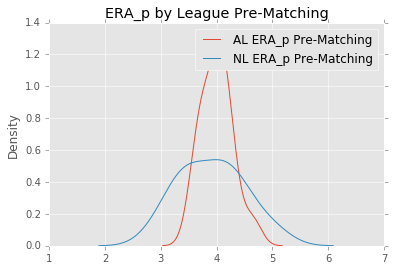

In [50]:
apre = df2015treeleague['ERA_p'][df2015treeleague['League'] == 1]
bpre = df2015treeleague['ERA_p'][df2015treeleague['League'] == 0]
apost = df2015treeleague['ERA_p'][treatmentindices]
bpost = df2015treeleague['ERA_p'][controlindices]


apre.plot(kind='kde',label='AL ERA_p Pre-Matching')
bpre.plot(kind='kde',label='NL ERA_p Pre-Matching')
plt.title('ERA_p by League Pre-Matching')
plt.legend()

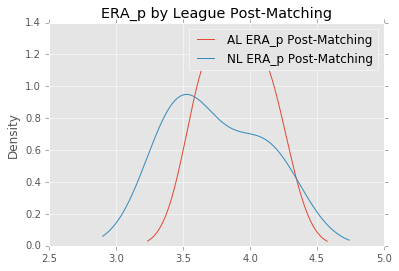

In [51]:
apost.plot(kind='kde',label='AL ERA_p Post-Matching')
bpost.plot(kind='kde',label='NL ERA_p Post-Matching')
plt.title('ERA_p by League Post-Matching')
plt.legend()

In [52]:
def make_pre_post_plots(columnname,df=df2015treeleague,splitcolumn='League',
                       treatmentindices=treatmentindices,
                       controlindices=controlindices):
    """Takes a columnname and makes plots of the CDFs for the pre-matching and post-matching as
    well as makes plots of the summaries for the pre and postmatching cases."""
    
    from scipy import stats
    
    ALPOST = df[columnname][treatmentindices].value_counts(normalize=True).sort_index().cumsum()
    NLPOST = df[columnname][controlindices].value_counts(normalize=True).sort_index().cumsum()
    
    dfpost = pd.DataFrame({'AL_POST_' + columnname: ALPOST,
                           'NL_POST_' + columnname: NLPOST})
    
    dfpost = dfpost.fillna(method='ffill')
    
    dfalpostdescribe = df[columnname][treatmentindices].describe()
    dfnlpostdescribe = df[columnname][controlindices].describe()
    
    dfpostdescribe = pd.DataFrame({'AL_POST_' + columnname: dfalpostdescribe,
                             'NL_POST_' + columnname: dfnlpostdescribe})
    
    ALPRE = df[columnname][df[splitcolumn] == 1].value_counts(normalize=True).sort_index().cumsum()
    NLPRE = df[columnname][df[splitcolumn] == 0].value_counts(normalize=True).sort_index().cumsum()
    
    
    
    
    dfpre = pd.DataFrame({'AL_PRE_' + columnname: ALPRE,
                       'NL_PRE_' + columnname: NLPRE})
    
    dfpre = dfpre.fillna(method='ffill')
    
    dfalpredescribe = df[columnname][df[splitcolumn] == 1].describe()
    dfnlpredescribe = df[columnname][df[splitcolumn] == 0].describe()
    
    dfpredescribe = pd.DataFrame({'AL_PRE_' + columnname: dfalpredescribe,
                             'NL_PRE_' + columnname: dfnlpredescribe})
    
    ALPREvals = df[columnname][df[splitcolumn] == 1].values
    NLPREvals = df[columnname][df[splitcolumn] == 0].values
    ALPOSTvals = df[columnname][treatmentindices].values
    NLPOSTvals = df[columnname][controlindices].values
    
    preresults = stats.ks_2samp(ALPREvals, NLPREvals)
    postresults = stats.ks_2samp(ALPOSTvals, NLPOSTvals)
    
    f, axarr = plt.subplots(2,2,figsize=(10,8))
    
    ax = axarr[0, 0]
    titlepre = columnname +  ' cdf pre-matching: \n' + 'ks statistic: ' + \
    str(preresults.statistic) +'\n pvalue: ' + str(preresults.pvalue)
    dfpre.plot(title=titlepre ,ax=ax)
    
    
    titlepost = columnname +  ' cdf post-matching: \n' + 'ks statistic: ' + \
    str(postresults.statistic) +'\n pvalue: ' + str(postresults.pvalue)
    ax = axarr[0,1]
    dfpost.plot(title=titlepost,ax=ax)
    
    
    ax = axarr[1,0]
    ax = dfpredescribe.plot(kind='bar', title='pre-matching',
                      ax=ax)
    ax.legend(loc='lower right')
    
    ax = axarr[1,1]
    ax = dfpostdescribe.plot(kind='bar', title='post-matching',
                       ax=ax)
    ax.legend(loc='lower right')
    
    
    
    

## <font color='teal'>Comparison of distributions of features pre and post matching</font>

We can see the results of matching by comparing how much closer the distributions of different features are between the treatment group (the AL teams that are matched) and the control group (the corresponding matched NL teams) (post matching) than are the corresponding distributions for all AL teams as compared to all NL teams (pre matching).
As a metric to compare distributions, use the Kolmogorov-Smirnov statistic on 2 samples. If this K-S statistic is small or the
p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same (which is what we want in the post matching case).

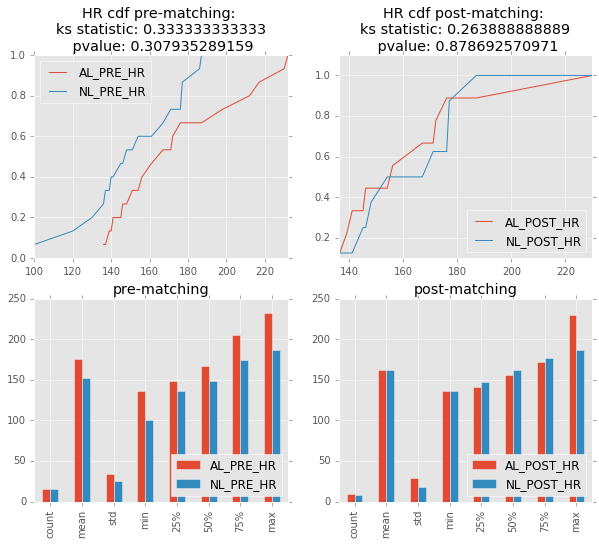

In [53]:
mpld3.disable_notebook()
make_pre_post_plots('HR')

In [54]:
df2015treeleague.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', '#P_p', 'PAge_p', 'RA/G_p',
       'W_p', 'L_p', 'W-L%_p', 'ERA_p', 'G_p', 'GS_p', 'GF_p', 'CG_p',
       'tSho_p', 'cSho_p', 'SV_p', 'IP_p', 'H_p', 'R_p', 'ER_p', 'HR_p',
       'BB_p', 'IBB_p', 'SO_p', 'HBP_p', 'BK_p', 'WP_p', 'BF_p', 'ERA+_p',
       'FIP_p', 'WHIP_p', 'H9_p', 'HR9_p', 'BB9_p', 'SO9_p', 'SO/W_p', 'LOB_p',
       'League', 'nearest', 'neighbor_1', 'neighbor_2', 'neighbor_3',
       'distance_1', 'distance_2', 'distance_3', 'neighbor_1_League',
       'neighbor_2_League', 'neighbor_3_League'],
      dtype='object')

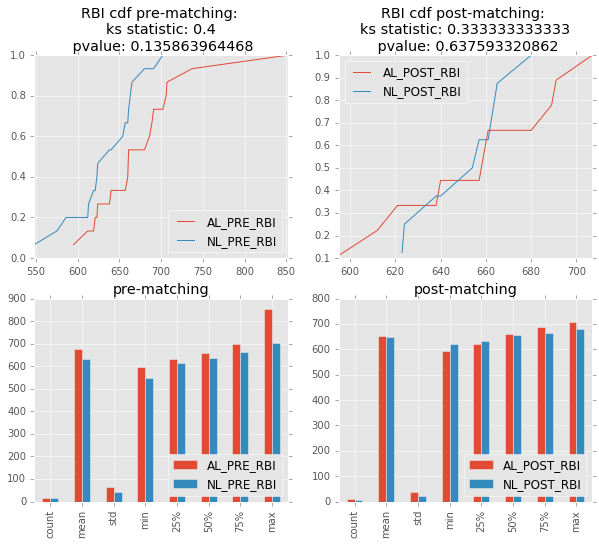

In [55]:
make_pre_post_plots('RBI')

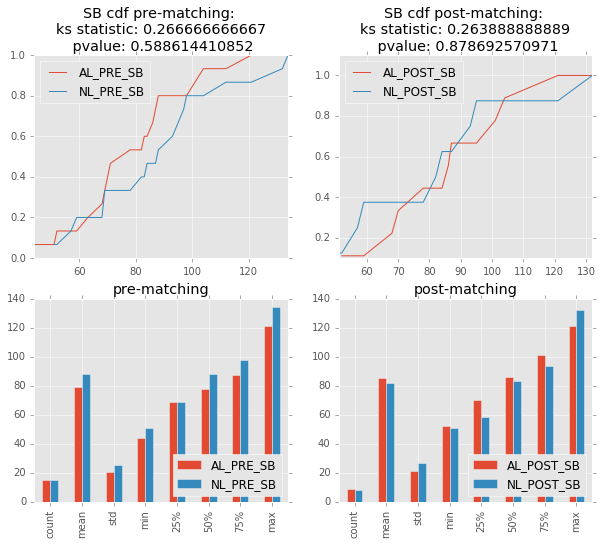

In [56]:
make_pre_post_plots('SB')

Make a function that loops over all of the columns of df2015treeleague (treating them as indices) and captures the PREks-statistic, the PRE-pvalue, the POSTks-statistic, and the POST-pvalue and returns a DataFrame with this information. This way we can identify which columns did not get "taken care." and not use them in any ML part of the project

In [57]:
def make_stats_dataframe(df=df2015treeleague,splitcolumn='League',
                        treatmentindices=treatmentindices,
                        controlindices=controlindices):
    """Loops through all of the columns in df and retuns a new dataframe with the statistics of the
    pre and post matched cdfs for each column."""
    
    from scipy import stats
    
    total_dict = dict()
    
    for columnname in df.columns:
    
        ALPREvals = df[columnname][df[splitcolumn] == 1].values
        NLPREvals = df[columnname][df[splitcolumn] == 0].values
        ALPOSTvals = df[columnname][treatmentindices].values
        NLPOSTvals = df[columnname][controlindices].values
    
        preresults = stats.ks_2samp(ALPREvals, NLPREvals)
        postresults = stats.ks_2samp(ALPOSTvals, NLPOSTvals)
    
        statslist = [preresults.statistic, preresults.pvalue, 
                    postresults.statistic, postresults.pvalue]
        
        total_dict[columnname] = statslist
     
    dfstats = pd.DataFrame.from_dict(total_dict, orient='index')
    dfstats.columns = ['pre_ks_stat','pre_pvalue','post_ks_stat','post_pvalue']
    
    dfstats.drop(['neighbor_1','neighbor_2','neighbor_3',
                 'neighbor_1_League','neighbor_2_League','neighbor_3_League',
                 'distance_1','distance_2','distance_3'],inplace=True)
    
    return dfstats

In [58]:
dfstats = make_stats_dataframe()

In [59]:
dfstats

,pre_ks_stat,pre_pvalue,post_ks_stat,post_pvalue
RBI,0.400000,1.358640e-01,0.333333,0.637593
OBP,0.200000,8.898999e-01,0.291667,0.790719
PAge_p,0.133333,9.983200e-01,0.319444,0.689803
H,0.266667,5.886144e-01,0.416667,0.352967
H9_p,0.200000,8.898999e-01,0.222222,0.966523
SV_p,0.133333,9.983200e-01,0.444444,0.278950
BK_p,0.266667,5.886144e-01,0.319444,0.689803
BA,0.200000,8.898999e-01,0.375000,0.485607
HR9_p,0.400000,1.358640e-01,0.388889,0.438718
PA,0.133333,9.983200e-01,0.402778,0.394429


In [60]:
fineones = (dfstats['post_pvalue'] >= .5)

## <font color='teal'>Here are the features where the difference between the treatment and control groupings p-values are > .5</font>

* these columns have at least a 50&#37; chance of having the treatment and control groups belonging to the same underlying distribution

In [61]:
dfnice = dfstats[fineones].sort_values('post_ks_stat',ascending=True).copy()

In [62]:
dfnice.shape

(30, 4)

In [63]:
dfnice.head(15)

,pre_ks_stat,pre_pvalue,post_ks_stat,post_pvalue
G_p,0.133333,0.998320,0.111111,1.000000
G,0.133333,0.998320,0.111111,1.000000
GS_p,0.133333,0.998320,0.111111,1.000000
SLG,0.400000,0.135864,0.138889,0.999979
cSho_p,0.200000,0.889900,0.138889,0.999979
AB,0.200000,0.889900,0.152778,0.999820
OPS+,0.400000,0.135864,0.194444,0.991764
OPS,0.400000,0.135864,0.194444,0.991764
TB,0.466667,0.051467,0.208333,0.982112
H9_p,0.200000,0.889900,0.222222,0.966523


In [64]:
dfnice.tail(15)

,pre_ks_stat,pre_pvalue,post_ks_stat,post_pvalue
BatAge,0.200000,0.889900,0.263889,0.878693
L_p,0.400000,0.135864,0.263889,0.878693
SB,0.266667,0.588614,0.263889,0.878693
OBP,0.200000,0.889900,0.291667,0.790719
H_p,0.200000,0.889900,0.305556,0.741237
#Bat,0.266667,0.588614,0.319444,0.689803
BK_p,0.266667,0.588614,0.319444,0.689803
PAge_p,0.133333,0.998320,0.319444,0.689803
SO_p,0.200000,0.889900,0.333333,0.637593
SO9_p,0.200000,0.889900,0.333333,0.637593


## <font color='teal'>After Matching, we can now ask interesting questions knowing we are comparing Apples to Apples</font>

First question:

* Which League has more enthusiastic fans? For each of the teams below, find the percentage of stadium capacity attendance for all of their home games. Then group this data by League (using only the matched teams), and compare the distributions.

We can answer this question by comparing these American League teams' stadium capacity:

* **CHW**, U.S. Cellular Field: 40,615
* **OAK** Oakland Coliseum: 34,077  http://oakland.athletics.mlb.com/oak/ballpark/information/index.jsp?content=groundrules
* **CLE** Progressive Field: 35,225
* **TBR** Tropicana Field: 40,473
* **HOU** Minute Maid Park: 40,950
* **LAA** Angel Stadium: 45,050
* **KCR** Kauffman Stadium: 37,903
* **MIN** Target Field: 39,504
* **TEX** Globe Life Park in Arlington: 49,115

with these National League teams:

* **NYM** Citi Field: 45,000
* **ARI** Chase Field: 48,519 
* **WSN** Nationals Park: 41,313
* **CHC** Wrigley Field: 42,495
* **MIL** Miller Park: 42,200
* **SDP** Petco Park: 41,164
* **LAD** Dodger Stadium: 56,000
* **SFG** AT&amp;T Park: 41,503



## <font color='teal'>After Matching, we can now ask interesting questions knowing we are comparing Apples to Apples</font>

Which League has more enthusiastic fans?  For each of the teams below, find the attendance for all of the home games in the treatment group (AL teams) and the control group (NL teams)




### <font color='teal'> National League Stadium Capacities</font>


| Team | Stadium | Stadium Capacity | 
|:---------:|:-------------:|:-----------|
| NYM  | Citi Field | 45000 |
| ARI  | Chase Field | 48519 |
| WSN  | Nationals Park | 41313 |
| CHC  | Wrigley Field | 42495 |
| MIL  | Miller Park | 42200 |
| SDP  | Petco Park | 41164 |
| LAD  | Dodger Stadium | 56000 |
| SFG  | AT&amp;T Park | 41503 |

Gives the total 2015 attendance per time as well as the averag attendance per game
http://www.baseball-reference.com/leagues/MLB/2015-misc.shtml

as well as 
http://espn.go.com/mlb/attendance

In [65]:
30763/.626


49142.172523961664

## <font color='teal'>This Data from ESPN gives the percentage of capacity attendance for each team's home games for 2015<font>

In [66]:
dfattendance = pd.read_html("http://espn.go.com/mlb/attendance/_/year/2015")
dfatt = dfattendance[0].copy()
dfatt.drop([dfatt.index[0],dfatt.index[1]],inplace=True)
del dfatt[6]
del dfatt[7]
del dfatt[8]
del dfatt[9]
del dfatt[10]
del dfatt[11]
dfatt.columns = ['RK','TEAM','GMS','TOTAL','AVG','PCT']
treatment = ['Chicago White Sox','Oakland','Cleveland',
                  'Tampa Bay','Houston','LA Angels','Kansas City',
                  'Minnesota','Texas']

control = ['NY Mets','Arizona','Washington','Chicago Cubs',
           'Milwaukee','San Diego','LA Dodgers','San Francisco']

dftreatment = dfatt[dfatt['TEAM'].isin(treatment)].copy()
dfcontrol = dfatt[dfatt['TEAM'].isin(control)].copy()

dftreatment.set_index('TEAM',inplace=True)
del dftreatment['RK']
dftreatment

,GMS,TOTAL,AVG,PCT
TEAM,,,,
LA Angels,81,3012765,37194,81.9
Kansas City,81,2708549,33438,88.2
Texas,81,2491875,30763,62.6
Minnesota,81,2220054,27408,69.4
Houston,81,2153585,26587,64.9
Chicago White Sox,80,1755810,21947,54.0
Oakland,81,1768175,21829,62.3
Cleveland,78,1388905,17806,41.0
Tampa Bay,81,1247668,15403,45.2


In [67]:
dfcontrol.set_index('TEAM',inplace=True)
del dfcontrol['RK']
dfcontrol

,GMS,TOTAL,AVG,PCT
TEAM,,,,
LA Dodgers,81,3764815,46479,83.0
San Francisco,81,3375882,41677,99.4
Chicago Cubs,81,2959812,36540,88.8
Washington,81,2619843,32343,77.9
NY Mets,81,2569753,31725,75.9
Milwaukee,81,2542558,31389,74.9
San Diego,81,2459752,30367,71.1
Arizona,81,2080145,25680,52.8


Its pretty clear from just looking at this data that the National League has more enthusiastic fans. But this is a small data set. We can say how confident we are in our assertion that the National League has more enthusiastic fans by sampling from the relevant distributions.

In [68]:
controlpct = dfcontrol['PCT']
treatmentpct = dftreatment['PCT']
print(controlpct)
print(treatmentpct)

TEAM
LA Dodgers       83.0
San Francisco    99.4
Chicago Cubs     88.8
Washington       77.9
NY Mets          75.9
Milwaukee        74.9
San Diego        71.1
Arizona          52.8
Name: PCT, dtype: object
TEAM
LA Angels            81.9
Kansas City          88.2
Texas                62.6
Minnesota            69.4
Houston              64.9
Chicago White Sox    54.0
Oakland              62.3
Cleveland            41.0
Tampa Bay            45.2
Name: PCT, dtype: object


### <font color='teal'>We can get the game-level attendance records from http://www.baseball-reference.com</font>

For Example:

In [69]:
IFrame("http://www.baseball-reference.com/teams/KCR/2015-schedule-scores.shtml",width=700, height=350)

Hold On! I get the game level attendance at sites like:
http://www.baseball-reference.com/teams/KCR/2015-schedule-scores.shtml

Sweet!

And let's changte things so that we are only interested in absolute attendance for their homes games, not percentage of capacity.  Nice!

In [70]:
kcrgames = pd.read_html("http://www.baseball-reference.com/teams/KCR/2015-schedule-scores.shtml#team_schedule::none")
len(kcrgames)

7

In [71]:
kcrgames = kcrgames[6].copy()
kcrgames.columns

Index(['Rk', 'Gm#', 'Date', 'Unnamed: 3', 'Tm', ' ', 'Opp', 'W/L', 'R', 'RA',
       'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak'],
      dtype='object')

In [72]:
goodcols = list(kcrgames.columns)
goodcols[5] = 'WHERE'
kcrgames.columns = goodcols
kcrgames.columns

Index(['Rk', 'Gm#', 'Date', 'Unnamed: 3', 'Tm', 'WHERE', 'Opp', 'W/L', 'R',
       'RA', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak'],
      dtype='object')

In [73]:
kcrgames['GB'].tail()

177    NaN
178    NaN
179    NaN
180    NaN
181    NaN
Name: GB, dtype: object

In [74]:
kcrgames = kcrgames[(kcrgames['WHERE'] != '@') & (kcrgames['Tm'] == 'KCR') & (kcrgames['GB'].notnull())].copy()
kcrgames[['Tm','WHERE','Opp','Time','Attendance']].head()

,Tm,WHERE,Opp,Time,Attendance
0,KCR,NaN,CHW,2:50,40085
1,KCR,NaN,CHW,3:11,23385
2,KCR,NaN,CHW,2:37,20236
9,KCR,NaN,OAK,2:33,39228
10,KCR,NaN,OAK,2:34,33151


In [75]:
kcrgames.shape

(81, 21)

In [76]:
kcrgames.tail()

,Rk,Gm#,Date,Unnamed: 3,Tm,WHERE,Opp,W/L,R,RA,...,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
153,151,151,"Wednesday, Sep 23",boxscore,KCR,NaN,SEA,W-wo,4,3,...,88-63,1,up10.0,Davis,Rollins,NaN,3:44,N,28756,+
154,152,152,"Thursday, Sep 24",boxscore,KCR,NaN,SEA,W,10,4,...,89-63,1,up11.0,Cueto,Kensing,NaN,3:23,N,32244,++
155,153,153,"Friday, Sep 25",boxscore,KCR,NaN,CLE,L,0,6,...,89-64,1,up11.0,Carrasco,Volquez,NaN,2:43,N,37049,-
156,154,154,"Saturday, Sep 26",boxscore,KCR,NaN,CLE,L,5,9,...,89-65,1,up10.0,McAllister,Medlen,NaN,3:03,N,38167,--
157,155,155,"Sunday, Sep 27",boxscore,KCR,NaN,CLE,W,3,0,...,90-65,1,up10.0,Young,Salazar,Davis,2:53,D,36339,+


In [77]:
# Make a Minutes column from the Time column.  Are new question is to ask whether 
# or not national league games take more time to play. We can also ask attendance questions

def make_minutes(s):
    """convert a string of form h:mm
    to an integer 60*h + mm"""
    u = s.split(':')
    minutes = 60*int(u[0]) + int(u[1])
    return minutes

In [78]:
make_minutes(kcrgames['Time'].iloc[5])

188

In [79]:
s = kcrgames['Time'].iloc[5]
u = s.split(':')
u

['3', '08']

In [80]:
kcrgames['Minutes'] = kcrgames['Time'].apply(make_minutes)
kcrgames[['Time','Minutes']].head()

,Time,Minutes
0,2:50,170
1,3:11,191
2,2:37,157
9,2:33,153
10,2:34,154


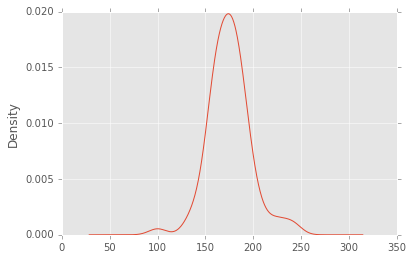

In [81]:
kcrgames.Minutes.plot(kind='kde')

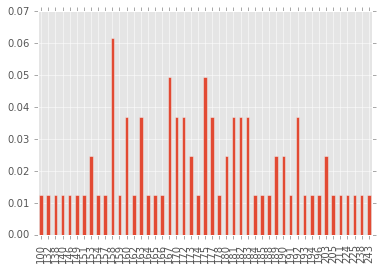

In [82]:
kcrgames.Minutes.value_counts(normalize=True).sort_index().plot(kind='bar')

In [83]:
kcrgames.Attendance = kcrgames.Attendance.astype('int')

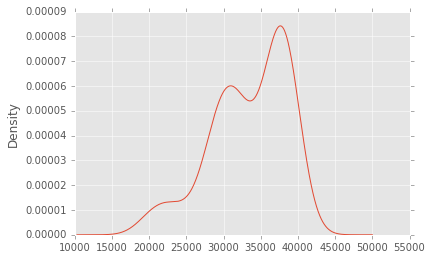

In [84]:
kcrgames.Attendance.plot(kind='kde')

In [85]:
def make_games_df(team):
    """Takes a url and team string and returns the analog of
    kcrgames prototyped above."""
    url = "http://www.baseball-reference.com/teams/" + team + "/2015-schedule-scores.shtml#team_schedule::none"
    teamgames = pd.read_html(url)
    teamgames = teamgames[-1].copy()
    goodcols = list(teamgames.columns)
    goodcols[5] = 'WHERE'
    teamgames.columns = goodcols
    teamfilter = (teamgames['WHERE'] != '@') & \
                 (teamgames['Tm'] == team) & \
                 (teamgames['GB'].notnull())
    teamgames = teamgames[teamfilter].copy()
    teamgames['Minutes'] = teamgames['Time'].apply(make_minutes)
    teamgames.Attendance = teamgames.Attendance.fillna(method='bfill')
    teamgames.Attendance = teamgames.Attendance.astype('int')
    return teamgames

In [86]:
bosgames = make_games_df('BOS')

Get all of the AL TEams first:

In [87]:
chwgames = make_games_df('CHW')
oakgames = make_games_df('OAK')
clegames = make_games_df('CLE')
tbrgames = make_games_df('TBR')
hougames = make_games_df('HOU')
laagames = make_games_df('LAA')
kcrgames = make_games_df('KCR')

In [88]:
mingames = make_games_df('MIN')
texgames = make_games_df('TEX')

In [89]:
treatmentgames = pd.concat([chwgames, oakgames, clegames, tbrgames,
                         hougames, laagames, kcrgames, mingames,
                         texgames])

In [90]:
treatmentgames.shape

(731, 22)

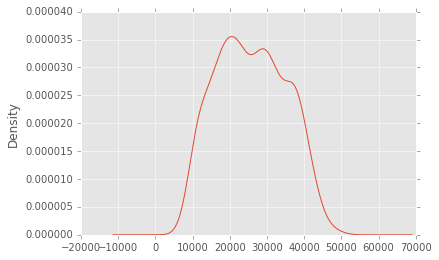

In [91]:
treatmentgames.Attendance.plot(kind='kde')

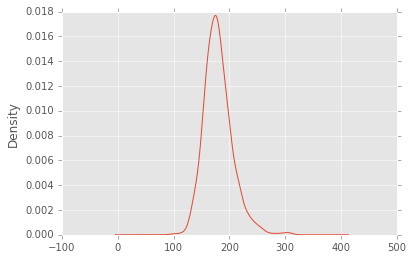

In [92]:
treatmentgames.Minutes.plot(kind='kde')

In [93]:
print(kcrgames.Attendance.std())
print(treatmentgames.Attendance.std())

5086.918808037721
9237.189399087485


In [94]:
nymgames = make_games_df('NYM')
arigames = make_games_df('ARI')
wsngames = make_games_df('WSN')
chcgames = make_games_df('CHC')
milgames = make_games_df('MIL')
sdpgames = make_games_df('SDP')
ladgames = make_games_df('LAD')
sfggames = make_games_df('SFG')

In [95]:
controlgames = pd.concat([nymgames, arigames, wsngames,
                         chcgames, milgames, sdpgames,
                         ladgames, sfggames])

So now we have ```treatmentgames``` which is the al post matched group, and
```controlgames```, which is the nl post matched group

In [96]:
treatmentminutes = treatmentgames.Minutes.copy()
controlminutes = controlgames.Minutes.copy()

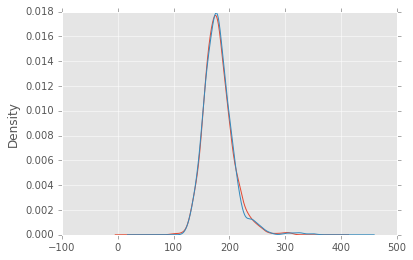

In [97]:
treatmentminutes.plot(kind='kde')
controlminutes.plot(kind='kde')

## <font color='teal'> Compare how long games last in the control and treatment groups<font>

The distrubtion of games lengths is almost identifical between two groups.

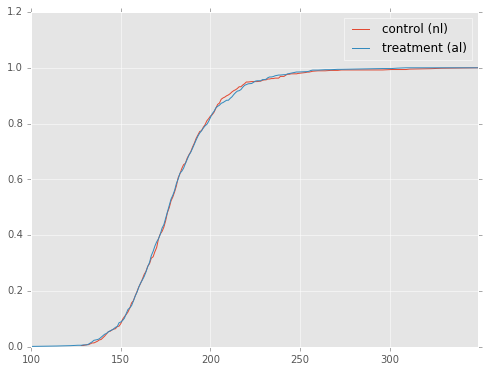

In [124]:
alminutes = treatmentminutes.value_counts(normalize=True).sort_index().cumsum()
nlminutes = controlminutes.value_counts(normalize=True).sort_index().cumsum()
dfminutes = pd.DataFrame({'treatment (al)': alminutes,
                         'control (nl)': nlminutes})
dfminutes = dfminutes.fillna(method='ffill')
dfminutes.plot(figsize=(8,6));

OK so there is no difference in how long the games are. What about attendance??

A **Huge** difference in attendance patterns between NL games and AL games in 2015.
I was not aware of this difference. Much greater attendance in NL games. The empirical data is shown below:

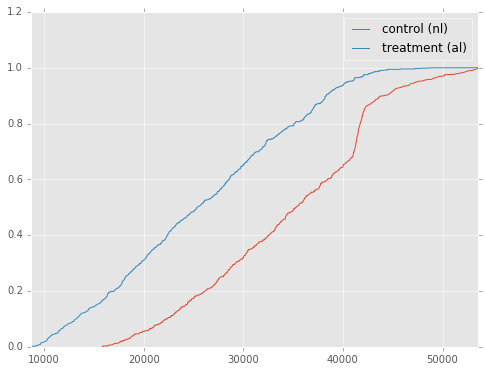

In [123]:
treatmentattendance = treatmentgames.Attendance.copy()
controlattendance = controlgames.Attendance.copy()

alattendance = treatmentattendance.value_counts(normalize=True).sort_index().cumsum()
nlattendance = controlattendance.value_counts(normalize=True).sort_index().cumsum()
dfattendance = pd.DataFrame({'treatment (al)': alattendance,
                         'control (nl)': nlattendance})
dfattendance = dfattendance.fillna(method='ffill')
dfattendance.plot(figsize=(8,6));

## <font color='teal'>Interesting! League has no effect of on time of game, but a huge effect on Attendance!</font>

Playing in an NL stadium "causes" the attendance to skyrocket (or rather the Nl League bosses lobby for better stadiums, promoting more attendance, or something like that is going on).
Now we need to sample from these CDFs like in the Bayesian A/B testing business.

Quantify the observed greater attendance in the NL vs. AL:

* draw equal size samples from the observed attendance distributions of the treatment (A) and control (NL) groups
* count the percentage of instances where the NL attendance is greater than the AL attendance

In [100]:
def get_value_from_cdf(acdf):
    import random
    pval = random.uniform(0,100)/100.0
    print(pval)
    return acdf[acdf <= pval].tail().index[0]


def get_one_group(acdf, numberofsubjects):
    """Returns a pandas series."""
    import random
    a = list()
    for i in range(numberofsubjects):
        try:
            b = get_value_from_cdf(acdf)
            a.append(b)
        except:
            pass
    c = pd.Series(a)
    return c

In [101]:
treatmentattendancecdf = treatmentattendance.value_counts(normalize=True).sort_index().cumsum()
treatmentattendancecdf.head(15)

8701     0.001368
9150     0.002736
9205     0.004104
9375     0.005472
9431     0.006840
9617     0.008208
9628     0.009576
9632     0.010944
9657     0.012312
9668     0.013680
9798     0.015048
9945     0.016416
10007    0.017784
10088    0.019152
10216    0.020520
Name: Attendance, dtype: float64

In [102]:
get_value_from_cdf(treatmentattendancecdf)

0.28281714346298636


18915

In [103]:
treatmentattendancecdf[treatmentattendancecdf >= .522700437554138].head(1)

26122    0.52394
Name: Attendance, dtype: float64

In [104]:
treatmentattendancecdf[treatmentattendancecdf <= .522700437554138].tail(1)

26070    0.522572
Name: Attendance, dtype: float64

In [105]:
treatattvals = treatmentattendance.values
controlattvals = controlattendance.values

In [106]:
np.percentile(treatattvals,52.27000437554138)

26099.693660955505

In [107]:
def get_value(vals):
    import random
    pval = random.uniform(0,100)
    #print(pval)
    return np.percentile(vals,pval)


def get_group(vals, numberofsubjects):
    """Returns a pandas series."""
    import random
    a = list()
    for i in range(numberofsubjects):
        try:
            b = get_value(vals)
            a.append(b)
        except:
            pass
    c = pd.Series(a)
    return c

In [108]:
treatsamp = get_group(treatattvals,15000)
controlsamp = get_group(controlattvals,15000)

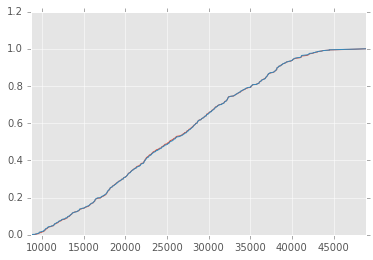

In [109]:
treatsamp.value_counts(normalize=True).sort_index().cumsum().plot()
treatmentattendance.value_counts(normalize=True).sort_index().cumsum().plot()

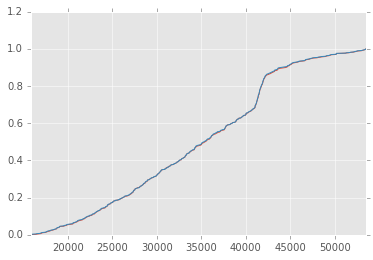

In [110]:
controlsamp.value_counts(normalize=True).sort_index().cumsum().plot()
controlattendance.value_counts(normalize=True).sort_index().cumsum().plot()

In [111]:
treatsamp = get_group(treatattvals,150000)
controlsamp = get_group(controlattvals,150000)

```
(controlsamp > treatsamp).values.mean()
```

In [112]:
(controlsamp > treatsamp).values.mean()

0.75252666666666668

So we can see here that in 2015 there is a 75&#37; chance that in any given National League game has a higher attendance does any given American League game!

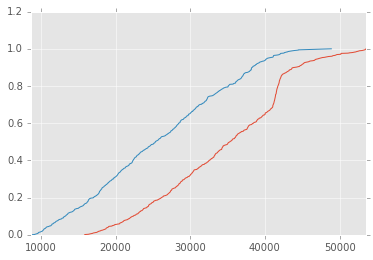

In [113]:
controlsamp.value_counts(normalize=True).sort_index().cumsum().plot();
treatsamp.value_counts(normalize=True).sort_index().cumsum().plot();